# Create model

In [1]:
from tensorflow.keras import layers
from tensorflow import keras, dtypes
from tensorflow.data import Dataset
from tensorflow import feature_column
import tensorflow as tf

from preprocess_tf import preprocessing_fn

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

import random
import os

%load_ext autoreload
%autoreload 2


In [2]:
# Seed value
# Apparently you may use different seed values at each stage
seed_value= 0

# 1. Set `PYTHONHASHSEED` environment variable at a fixed value

os.environ['PYTHONHASHSEED']=str(seed_value)

# 2. Set `python` built-in pseudo-random generator at a fixed value

random.seed(seed_value)

# 3. Set `numpy` pseudo-random generator at a fixed value
np.random.seed(seed_value)

# 4. Set the `tensorflow` pseudo-random generator at a fixed value
tf.random.set_seed(seed_value)


tf.keras.backend.set_floatx('float32')

In [3]:
# A utility method to create a tf.data dataset from a Pandas Dataframe
def df_to_dataset(dataframe, target_name, shuffle=True, batch_size=100):
    dataframe = dataframe.copy()
    targets = dataframe.pop(target_name)
    ds = Dataset.from_tensor_slices((dict(dataframe), targets))
    if shuffle:
        ds = ds.shuffle(buffer_size=len(dataframe))
    ds = ds.batch(batch_size)
    return ds

In [4]:
def r2_score(y_true, y_pred):
    ss_res = np.sum((y_true - y_pred)**2)
    ss_tot = np.sum((y_true - np.mean(y_true))**2)
    r2 = 1 - ss_res/ss_tot
    return r2

In [5]:
# def set_numerical_feature(name):
    
#     numerical_feature = feature_column.numeric_column(name, dtype=dtypes.float32)
    
#     return numerical_feature
    
# def set_one_hot_feature(name, data):
#     one_hot_feature = feature_column.categorical_column_with_vocabulary_list(name, data[name].unique().tolist())
#     one_hot_feature = feature_column.indicator_column(one_hot_feature)
    
#     return one_hot_feature

# def set_embedding_feature(name, data, dims):
#     embedding_feature = feature_column.categorical_column_with_vocabulary_list(name, data[name].unique().tolist())
#     embedding_feature = feature_column.embedding_column(embedding_feature, dimension=dims)
    
#     return embedding_feature

In [6]:
# def feature_columns(data, dataset):
    
#     feature_columns = []

#     # numeric cols
#     for header in ['yearOfRegistration', 'powerPS', 'kilometer']:
#         feature_columns.append(set_numerical_feature(header))
        
#     feature_columns.append(set_one_hot_feature('abtest', data))
    
#     feature_columns.append(set_one_hot_feature('vehicleType', data))
    
#     feature_columns.append(set_one_hot_feature('gearbox', data))
    
#     feature_columns.append(set_one_hot_feature('fuelType', data))
    
#     feature_columns.append(set_one_hot_feature('brand', data))

#     feature_columns.append(set_one_hot_feature('cluster_model', data))
    
#     feature_columns.append(set_one_hot_feature('notRepairedDamage', data))
    
    
#     feature_layer = layers.DenseFeatures(feature_columns)
    
#     return feature_layer

In [8]:
train = preprocessing_fn(
    data='data/train.csv',
    norm_params='data/numerical_features_normalization.csv',
    model_clusters='data/model_clusters.csv'
)
val = preprocessing_fn(
    data='data/val.csv',
    norm_params='data/numerical_features_normalization.csv',
    model_clusters='data/model_clusters.csv',
)
test = preprocessing_fn(
    data='data/test.csv',
    norm_params='data/numerical_features_normalization.csv',
    model_clusters='data/model_clusters.csv'
)

train = train.dropna()
val = val.dropna()
test = test.dropna()

print(train.shape)
print(val.shape)
print(test.shape)

(88266, 11)
(22093, 11)
(47219, 11)


In [9]:
train.dtypes

price                   int32
abtest                 object
vehicleType            object
yearOfRegistration    float32
gearbox                object
powerPS               float32
kilometer             float32
fuelType               object
brand                  object
notRepairedDamage      object
cluster_model           int32
dtype: object

In [10]:
train_ds = df_to_dataset(dataframe=train, target_name='price', shuffle=True, batch_size=512)
val_ds = df_to_dataset(dataframe=val, target_name='price', shuffle=True, batch_size=512)
test_ds = df_to_dataset(dataframe=test, target_name='price', shuffle=True, batch_size=512)

In [9]:
# feature_layer = feature_columns(train, train_ds)

In [15]:
from cars_model import getModel
%reload_ext autoreload
%autoreload 2

model = getModel(data=train, dp_rate=0.1, hu=60)

Epoch 1/100
173/173 [==============================] - 2s 12ms/step - loss: 2689.0791 - mean_squared_error: 23841300.0000 - val_loss: 1462.5696 - val_mean_squared_error: 13607576.0000
Epoch 2/100
173/173 [==============================] - 2s 10ms/step - loss: 1357.7007 - mean_squared_error: 12144534.0000 - val_loss: 1210.9923 - val_mean_squared_error: 13126526.0000
Epoch 3/100
173/173 [==============================] - 2s 11ms/step - loss: 1241.4844 - mean_squared_error: 8551397.0000 - val_loss: 1101.0637 - val_mean_squared_error: 5572199.5000
Epoch 4/100
173/173 [==============================] - 2s 10ms/step - loss: 1171.8784 - mean_squared_error: 5232381.5000 - val_loss: 1050.5747 - val_mean_squared_error: 4397810.5000
Epoch 5/100
173/173 [==============================] - 2s 10ms/step - loss: 1136.8309 - mean_squared_error: 4664044.0000 - val_loss: 1051.7194 - val_mean_squared_error: 4225191.5000
Epoch 6/100
173/173 [==============================] - 2s 10ms/step - loss: 1118.7240 

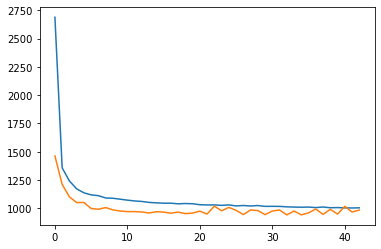

In [17]:
# dp_rate = 0.1
# hu = 60
# momentum = 0.9

# model = keras.Sequential([
#     feature_layer,
#     layers.Dense(hu),
#     layers.Activation('relu'),
#     layers.Dropout(rate=dp_rate),
#     layers.Dense(hu),
#     layers.Activation('relu'),
#     layers.Dropout(rate=dp_rate),
#     layers.Dense(hu),
#     layers.Activation('relu'),
#     layers.Dropout(rate=dp_rate),
#     layers.Dense(hu),
#     layers.Activation('relu'),
#     layers.Dropout(rate=dp_rate),
#     layers.Dense(hu),
#     layers.Activation('relu'),
#     layers.Dropout(rate=dp_rate),
#     layers.Dense(hu),
#     layers.Activation('relu'),
#     layers.Dense(1, activation='relu')
# ])

# Compile Keras model
lr = 0.001
model.compile(
    loss='mean_absolute_error',
    metrics=['mean_squared_error'],
    optimizer=keras.optimizers.Adam(learning_rate=lr))

# fit model
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=100,
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)]
)

# get results
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

plt.plot(hist.epoch, hist.loss)
plt.plot(hist.epoch, hist.val_loss)
plt.show()

In [18]:
hist.tail(10)

,loss,mean_squared_error,val_loss,val_mean_squared_error,epoch
33,1010.673645,3636120.25,975.788513,3482295.50,33
34,1009.640320,3621157.00,941.977173,3342719.75,34
35,1010.744690,3623050.25,959.634705,3371051.50,35
36,1006.398376,3685689.00,993.906189,3593067.00,36
37,1011.495911,3657992.25,945.925598,3343350.75,37
38,1004.886230,3647696.50,990.643738,3580876.50,38
39,1006.369995,3564747.25,948.991516,3361996.25,39
40,1003.626953,3576525.25,1017.310669,3724710.00,40
41,1002.829651,3593011.50,967.309387,3465047.25,41
42,1004.143372,3619260.25,983.760132,3546376.50,42


In [19]:
tf.keras.models.save_model(model, "cars_model")

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: cars_model\assets


In [6]:
# model = tf.keras.models.load_model("cars_model")

# a = df_to_dataset(dataframe=val, target_name='price', shuffle=False, batch_size=1000)

# preds = model.predict(a)

In [19]:
# a = df_to_dataset(dataframe=val, target_name='price', shuffle=False, batch_size=1000)

# preds = model.predict(a)

In [20]:
# Validation results
print('VALIDATION RESULTS\n')
val_pred = model.predict(df_to_dataset(dataframe=val, target_name='price', shuffle=False, batch_size=1000)).flatten()

val['price_pred'] = val_pred
val['abs_error'] = abs(val.price_pred - val.price)
val['error'] = val.price_pred - val.price

# super baseline model
print('baseline abs error: ' + str(np.mean(np.abs(val.price - train.price.mean()))))

# my model
print('model abs error: ' + str(np.mean(np.abs(val.price - val_pred))))

# r squared
print('model r2: ' + str(r2_score(val.price, val.price_pred)))

VALIDATION RESULTS

baseline abs error: 3515.769520968634
model abs error: 983.7600334926173
model r2: 0.8674220370853023


In [21]:
# Test results
print('TEST RESULTS\n')
test_pred = model.predict(df_to_dataset(dataframe=test, target_name='price', shuffle=False, batch_size=1000)).flatten()

test['price_pred'] = test_pred
test['abs_error'] = abs(test.price_pred - test.price)
test['error'] = test.price_pred - test.price

worst_predictions = test.copy().loc[test.abs_error >= test.abs_error.quantile(0.9)]

# super baseline model
print('baseline abs error: ' + str(np.mean(np.abs(test.price - train.price.mean()))))

# my model
print('model abs error: ' + str(np.mean(np.abs(test.price - test_pred))))

# r squared
print('model r2: ' + str(r2_score(test.price, test.price_pred)))

TEST RESULTS

baseline abs error: 3519.359949713082
model abs error: 977.4726850691052
model r2: 0.8690064449137819


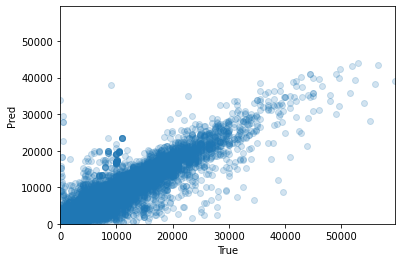

In [22]:
plt.scatter(test.price, test_pred, alpha=0.2)
plt.xlim([0, test.price.max()])
plt.ylim([0, test.price.max()])
plt.xlabel('True')
plt.ylabel('Pred')
plt.show()

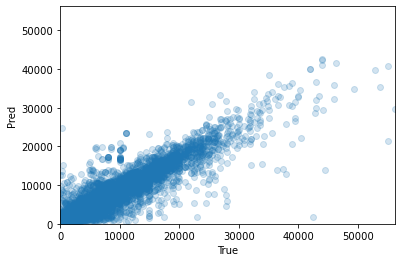

In [23]:
plt.scatter(val.price, val_pred, alpha=0.2)
plt.xlim([0, val.price.max()])
plt.ylim([0, val.price.max()])
plt.xlabel('True')
plt.ylabel('Pred')
plt.show()

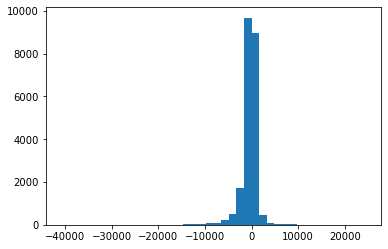

In [24]:
plt.hist(val.error, bins=40)
plt.show()

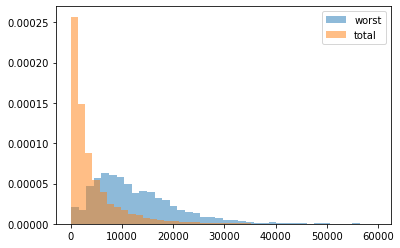

In [25]:
plt.hist(worst_predictions.price, bins=40, alpha=0.5, density=True, label='worst')
plt.hist(val.price, bins=40, alpha=0.5, density=True, label='total')
plt.legend()
plt.show()

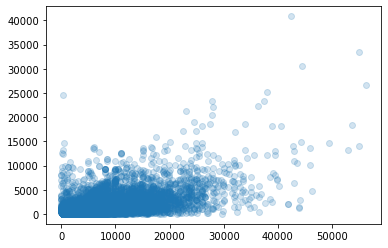

In [26]:
plt.scatter(val.price, val.abs_error, alpha=0.2)
plt.show()

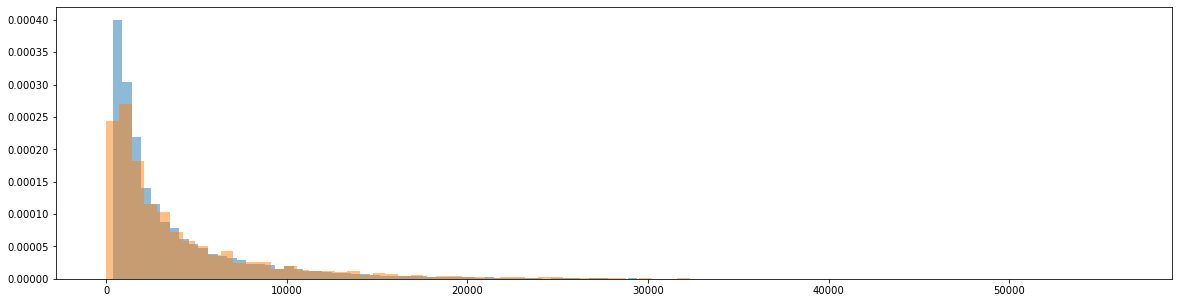

In [27]:
plt.figure(figsize=(20,5))
plt.hist(val.price_pred, bins=80, alpha=0.5, density=True)
plt.hist(val.price, bins=80, alpha=0.5, density=True)
plt.show()

In [28]:
test.price.max()

59500

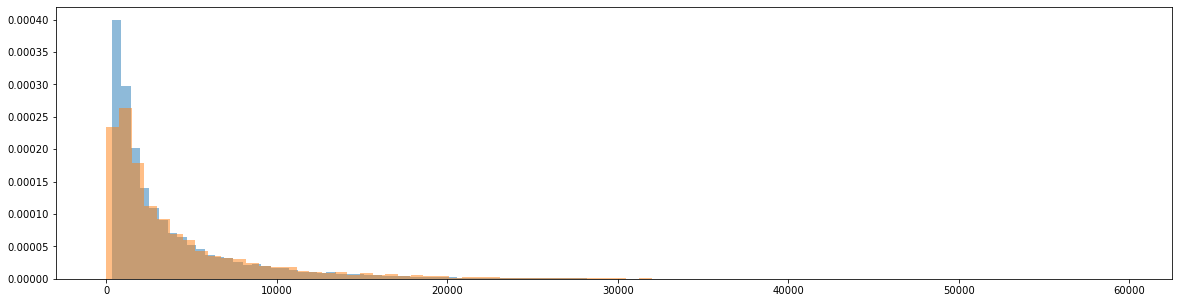

In [30]:
plt.figure(figsize=(20,5))
plt.hist(test.price_pred, bins=80, alpha=0.5, density=True)
plt.hist(test.price, bins=80, alpha=0.5, density=True)
plt.show()